Getting Data...
Girvan Newman Algorithm
[50, 138, 491, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
number of communities discovered: 10

average number of users per community: 68.9

Saving results to cluster_result.txt
Making network image


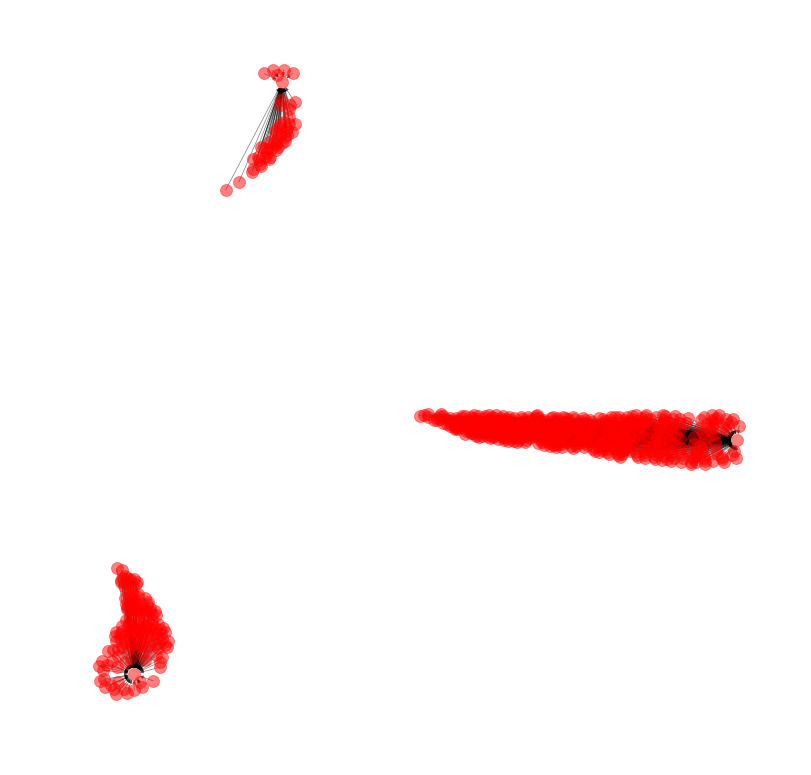

In [2]:
"""Cluster Data"""


import sys
import time
import matplotlib.pyplot as plt
import os
from TwitterAPI import TwitterAPI
import re
import warnings
import pickle
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import itertools
from networkx.algorithms.community.centrality import girvan_newman
import networkx as nx


def create_graph(ids, friends):
    graph = nx.DiGraph()
    for i in range(0, 5):
        graph.add_node(ids[i])
        for item in friends:
            for ID in item:
                if ID in friends[i]:
                    graph.add_edge(ID, ids[i])
    return graph

def main():
    print("Getting Data...")
    friends = pickle.load(open('friends.pkl','rb'))
    ids = pickle.load(open('ids.pkl','rb'))
                
    graph = create_graph(ids, friends)
    k = 10
    print("Girvan Newman Algorithm")
    comp = girvan_newman(graph)
    result =[[len(c) for c in communities]  for communities in itertools.islice(comp, k)][9]
    print(result)
    average_users = 0
    for i in result:
        average_users += i
    average_users = average_users/k
    print("number of communities discovered: "+str(k)+'\n')
    print("average number of users per community: "+str(average_users)+'\n')
    
    print("Saving results to cluster_result.txt")
    f = open("cluster_results.txt", 'w')
    f.write("number of communities discovered: "+str(k)+'\n')
    f.write("average number of users per community: "+str(average_users)+'\n')
    f.close()
    
    print("Making network image")
    plt.figure(figsize=(20,20),dpi=50)
    plt.savefig('NETWORK',type="PNG")
    nx.draw_networkx(graph,alpha=0.5,with_labels=False)
    plt.axis("off")
    plt.show()

       
if __name__ == '__main__':
    main()